In [1]:
import pandas as pd
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index

In [2]:
df1 = pd.read_csv('g:\\001.csv')
df2 = pd.read_csv('g:\\002.csv')

In [3]:
df1['SurvivalTime'] = df1['days_to_death'] / 30.44
df2['SurvivalTime'] = df2['days_to_death'] / 30.44
selected_genes = ['CD74', 'PSMB1', 'HSP90B1', 'HSPA5', 'CCT7','RALA','MDH1','NFE2L2','ATP5MC1','PCMT1','ZFAND5']
gene_columns = ['event', 'SurvivalTime'] + selected_genes
df1 = df1[gene_columns]
df2 = df2[gene_columns]

In [4]:
matched_pairs = []
for i, row1 in df1.iterrows():
    for j, row2 in df2.iterrows():
        if row1['event'] == 1 and row2['event'] == 1 and row1['SurvivalTime'] < row2['SurvivalTime']:
            matched_pairs.append((i, j))

In [5]:
cph = CoxPHFitter()

In [6]:
cph.fit(df1, duration_col='SurvivalTime', event_col='event')
cph = CoxPHFitter(penalizer=0.01)
cph.fit(df2, duration_col='SurvivalTime', event_col='event')

<lifelines.CoxPHFitter: fitted with 96 total observations, 5 right-censored observations>

In [7]:
predicted_survival_1 = cph.predict_survival_function(df1)
predicted_hazard_1 = -cph.predict_partial_hazard(df1)
predicted_survival_1_values = predicted_survival_1.values
predicted_survival_2 = cph.predict_survival_function(df2)
predicted_hazard_2 = -cph.predict_partial_hazard(df2)
predicted_survival_2_values = predicted_survival_2.values

In [8]:
df = pd.concat([df1, df2], ignore_index=True)

In [9]:
cph = CoxPHFitter()
cph.fit(df, duration_col='SurvivalTime', event_col='event')

<lifelines.CoxPHFitter: fitted with 191 total observations, 5 right-censored observations>

In [10]:
predicted_hazard = -cph.predict_partial_hazard(df)

In [11]:
c_index = concordance_index(event_times=df['SurvivalTime'], predicted_scores=predicted_hazard, event_observed=df['event'])

In [12]:
import matplotlib.pyplot as plt
predicted_survival = cph.predict_survival_function(df)

In [13]:
import matplotlib.pyplot as plt
predicted_survival_1 = cph.predict_survival_function(df1[['CD74', 'PSMB1', 'HSP90B1', 'HSPA5', 'CCT7','RALA','MDH1','NFE2L2','ATP5MC1','PCMT1','ZFAND5']])
predicted_survival_2 = cph.predict_survival_function(df2[['CD74', 'PSMB1', 'HSP90B1', 'HSPA5', 'CCT7','RALA','MDH1','NFE2L2','ATP5MC1','PCMT1','ZFAND5']])
mean_survival_1 = predicted_survival_1.mean(axis=1)
mean_survival_2 = predicted_survival_2.mean(axis=1)

In [14]:
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
results = logrank_test(df1['SurvivalTime'], df2['SurvivalTime'], event_observed_A=df1['event'], event_observed_B=df2['event'])
p_value = results.p_value

In [15]:
import matplotlib.pyplot as plt
predicted_survival_1 = cph.predict_survival_function(df1[ ['CD74', 'PSMB1', 'HSP90B1', 'HSPA5', 'CCT7','RALA','MDH1','NFE2L2','ATP5MC1','PCMT1','ZFAND5']])
predicted_survival_2 = cph.predict_survival_function(df2[ ['CD74', 'PSMB1', 'HSP90B1', 'HSPA5', 'CCT7','RALA','MDH1','NFE2L2','ATP5MC1','PCMT1','ZFAND5']])
mean_survival_1 = predicted_survival_1.mean(axis=1)
mean_survival_2 = predicted_survival_2.mean(axis=1)

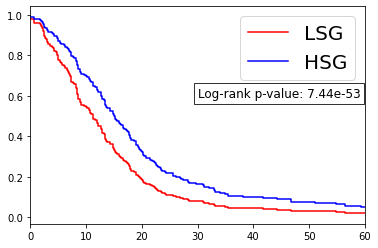

In [16]:
min_time = min(mean_survival_1.index.min(), mean_survival_2.index.min())
max_time = max(mean_survival_1.index.max(), mean_survival_2.index.max())
plt.xlim(0, 60)
plt.step(mean_survival_1.index, mean_survival_1.values, label='LSG', color='red')
plt.step(mean_survival_2.index, mean_survival_2.values, label='HSG', color='blue')
#plt.xlabel('months')
#plt.ylabel('Survival Probability')
#plt.title('BLCA')
plt.text(30, 0.595, f'Log-rank p-value: {p_value:.2e}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.8))
plt.legend(fontsize=20) 
plt.show()

In [17]:
import pandas as pd
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
df1 = pd.read_csv('g:\\BRCA1.csv')
df2 = pd.read_csv('g:\\BRCA2.csv')
df1['SurvivalTime'] = df1['days_to_death'] / 30.44
df2['SurvivalTime'] = df2['days_to_death'] / 30.44
selected_genes = ['SLC39A9','SEL1L','CCDC124','TINF2','SDC1','AP2S1','MGST1','LYPLA2','FAM50A']
gene_columns = ['event', 'SurvivalTime'] + selected_genes
df1 = df1[gene_columns]
df2 = df2[gene_columns]

In [18]:
matched_pairs = []
for i, row1 in df1.iterrows():
    for j, row2 in df2.iterrows():
        if row1['event'] == 1 and row2['event'] == 1 and row1['SurvivalTime'] < row2['SurvivalTime']:
            matched_pairs.append((i, j))
cph = CoxPHFitter()
cph.fit(df1, duration_col='SurvivalTime', event_col='event')
cph = CoxPHFitter(penalizer=0.01)
cph.fit(df2, duration_col='SurvivalTime', event_col='event')
predicted_survival_1 = cph.predict_survival_function(df1)
predicted_hazard_1 = -cph.predict_partial_hazard(df1)
predicted_survival_1_values = predicted_survival_1.values

In [19]:
predicted_survival_2 = cph.predict_survival_function(df2)
predicted_hazard_2 = -cph.predict_partial_hazard(df2)
predicted_survival_2_values = predicted_survival_2.values
df = pd.concat([df1, df2], ignore_index=True)
cph = CoxPHFitter()
cph.fit(df, duration_col='SurvivalTime', event_col='event')
predicted_hazard = -cph.predict_partial_hazard(df)
c_index = concordance_index(event_times=df['SurvivalTime'], predicted_scores=predicted_hazard, event_observed=df['event'])

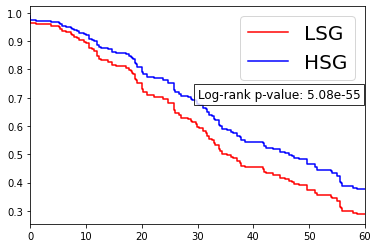

In [20]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
results = logrank_test(df1['SurvivalTime'], df2['SurvivalTime'], event_observed_A=df1['event'], event_observed_B=df2['event'])
p_value = results.p_value
predicted_survival_1 = cph.predict_survival_function(df1[ ['SLC39A9','SEL1L','CCDC124','TINF2','SDC1','AP2S1','MGST1','LYPLA2','FAM50A']])
predicted_survival_2 = cph.predict_survival_function(df2[ ['SLC39A9','SEL1L','CCDC124','TINF2','SDC1','AP2S1','MGST1','LYPLA2','FAM50A']])
mean_survival_1 = predicted_survival_1.mean(axis=1)
mean_survival_2 = predicted_survival_2.mean(axis=1)
min_time = min(mean_survival_1.index.min(), mean_survival_2.index.min())
max_time = max(mean_survival_1.index.max(), mean_survival_2.index.max())
plt.xlim(0, 60)
plt.step(mean_survival_1.index, mean_survival_1.values, label='LSG', color='red')
plt.step(mean_survival_2.index, mean_survival_2.values, label='HSG', color='blue')
#plt.xlabel('months')
#plt.ylabel('Survival Probability')
#plt.title('BRCA')
plt.text(30, 0.7, f'Log-rank p-value: {p_value:.2e}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.8))
plt.legend(fontsize=20) 
plt.show()

In [21]:
import pandas as pd
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
df1 = pd.read_csv('g:\\HNSC1.csv')
df2 = pd.read_csv('g:\\HNSC2.csv')
df1['SurvivalTime'] = df1['days_to_death'] / 30.44
df2['SurvivalTime'] = df2['days_to_death'] / 30.44
selected_genes = ['PCMT1','TMSB10','KRT16P2','SNX3','SLC44A1','DIP2B']
gene_columns = ['event', 'SurvivalTime'] + selected_genes
df1 = df1[gene_columns]
df2 = df2[gene_columns]
matched_pairs = []
for i, row1 in df1.iterrows():
    for j, row2 in df2.iterrows():
        if row1['event'] == 1 and row2['event'] == 1 and row1['SurvivalTime'] < row2['SurvivalTime']:
            matched_pairs.append((i, j))
cph = CoxPHFitter()
cph.fit(df1, duration_col='SurvivalTime', event_col='event')
cph = CoxPHFitter(penalizer=0.01)
cph.fit(df2, duration_col='SurvivalTime', event_col='event')
predicted_survival_1 = cph.predict_survival_function(df1)
predicted_hazard_1 = -cph.predict_partial_hazard(df1)
predicted_survival_1_values = predicted_survival_1.values
predicted_survival_2 = cph.predict_survival_function(df2)
predicted_hazard_2 = -cph.predict_partial_hazard(df2)
predicted_survival_2_values = predicted_survival_2.values
df = pd.concat([df1, df2], ignore_index=True)
cph = CoxPHFitter()
cph.fit(df, duration_col='SurvivalTime', event_col='event')
predicted_hazard = -cph.predict_partial_hazard(df)
c_index = concordance_index(event_times=df['SurvivalTime'], predicted_scores=predicted_hazard, event_observed=df['event'])

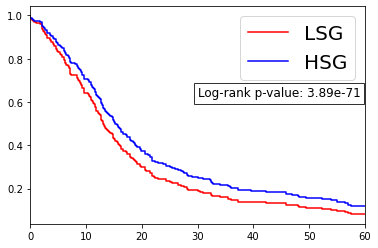

In [22]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
results = logrank_test(df1['SurvivalTime'], df2['SurvivalTime'], event_observed_A=df1['event'], event_observed_B=df2['event'])
p_value = results.p_value
predicted_survival_1 = cph.predict_survival_function(df1[ ['PCMT1','TMSB10','KRT16P2','SNX3','SLC44A1','DIP2B']])
predicted_survival_2 = cph.predict_survival_function(df2[['PCMT1','TMSB10','KRT16P2','SNX3','SLC44A1','DIP2B']])
mean_survival_1 = predicted_survival_1.mean(axis=1)
mean_survival_2 = predicted_survival_2.mean(axis=1)
min_time = min(mean_survival_1.index.min(), mean_survival_2.index.min())
max_time = max(mean_survival_1.index.max(), mean_survival_2.index.max())
plt.xlim(0, 60)
plt.step(mean_survival_1.index, mean_survival_1.values, label='LSG', color='red')
plt.step(mean_survival_2.index, mean_survival_2.values, label='HSG', color='blue')
#plt.xlabel('months')
#plt.ylabel('Survival Probability')
#plt.title('HNSC')
plt.text(30, 0.625, f'Log-rank p-value: {p_value:.2e}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.8))
plt.legend(fontsize=20) 
plt.show()

In [23]:
import pandas as pd
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
df1 = pd.read_csv('g:\\KIRC1.csv')
df2 = pd.read_csv('g:\\KIRC2.csv')
df1['SurvivalTime'] = df1['days_to_death'] / 30.44
df2['SurvivalTime'] = df2['days_to_death'] / 30.44
selected_genes = ['PDK4','ERLEC1']
gene_columns = ['event', 'SurvivalTime'] + selected_genes
df1 = df1[gene_columns]
df2 = df2[gene_columns]
matched_pairs = []
for i, row1 in df1.iterrows():
    for j, row2 in df2.iterrows():
        if row1['event'] == 1 and row2['event'] == 1 and row1['SurvivalTime'] < row2['SurvivalTime']:
            matched_pairs.append((i, j))
cph = CoxPHFitter()
cph.fit(df1, duration_col='SurvivalTime', event_col='event')
cph = CoxPHFitter(penalizer=0.01)
cph.fit(df2, duration_col='SurvivalTime', event_col='event')
predicted_survival_1 = cph.predict_survival_function(df1)
predicted_hazard_1 = -cph.predict_partial_hazard(df1)
predicted_survival_1_values = predicted_survival_1.values
predicted_survival_2 = cph.predict_survival_function(df2)
predicted_hazard_2 = -cph.predict_partial_hazard(df2)
predicted_survival_2_values = predicted_survival_2.values
df = pd.concat([df1, df2], ignore_index=True)
cph = CoxPHFitter()
cph.fit(df, duration_col='SurvivalTime', event_col='event')
predicted_hazard = -cph.predict_partial_hazard(df)
c_index = concordance_index(event_times=df['SurvivalTime'], predicted_scores=predicted_hazard, event_observed=df['event'])

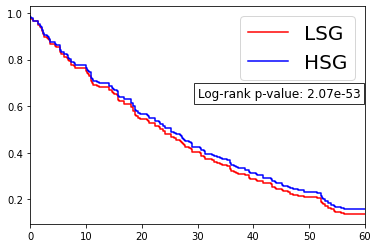

In [24]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
results = logrank_test(df1['SurvivalTime'], df2['SurvivalTime'], event_observed_A=df1['event'], event_observed_B=df2['event'])
p_value = results.p_value
predicted_survival_1 = cph.predict_survival_function(df1[ ['PDK4','ERLEC1']])
predicted_survival_2 = cph.predict_survival_function(df2[ ['PDK4','ERLEC1']])
mean_survival_1 = predicted_survival_1.mean(axis=1)
mean_survival_2 = predicted_survival_2.mean(axis=1)
min_time = min(mean_survival_1.index.min(), mean_survival_2.index.min())
max_time = max(mean_survival_1.index.max(), mean_survival_2.index.max())
plt.xlim(0, 60)
plt.step(mean_survival_1.index, mean_survival_1.values, label='LSG', color='red')
plt.step(mean_survival_2.index, mean_survival_2.values, label='HSG', color='blue')
#plt.xlabel('months')
#plt.ylabel('Survival Probability')
#plt.title('KIRC')
plt.text(30, 0.64, f'Log-rank p-value: {p_value:.2e}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.8))
plt.legend(fontsize=20) 
plt.show()

In [25]:
import pandas as pd
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
df1 = pd.read_csv('g:\\LIHC1.csv')
df2 = pd.read_csv('g:\\LIHC2.csv')
df1['SurvivalTime'] = df1['days_to_death'] / 30.44
df2['SurvivalTime'] = df2['days_to_death'] / 30.44
selected_genes = ['ARF5','MRPS35','CPB2','C6','RHOA','CSDE1','PON1','GDI2','SPP2','STRAP','ITIH1','SEC61A1','C8B','PABPC1','YBX1','SCARB1','NDUFB4','CTNNA1','LASP1']
gene_columns = ['event', 'SurvivalTime'] + selected_genes
df1 = df1[gene_columns]
df2 = df2[gene_columns]
matched_pairs = []
for i, row1 in df1.iterrows():
    for j, row2 in df2.iterrows():
        if row1['event'] == 1 and row2['event'] == 1 and row1['SurvivalTime'] < row2['SurvivalTime']:
            matched_pairs.append((i, j))
cph = CoxPHFitter()
cph.fit(df1, duration_col='SurvivalTime', event_col='event')
cph = CoxPHFitter(penalizer=0.01)
cph.fit(df2, duration_col='SurvivalTime', event_col='event')
predicted_survival_1 = cph.predict_survival_function(df1)
predicted_hazard_1 = -cph.predict_partial_hazard(df1)
predicted_survival_1_values = predicted_survival_1.values
predicted_survival_2 = cph.predict_survival_function(df2)
predicted_hazard_2 = -cph.predict_partial_hazard(df2)
predicted_survival_2_values = predicted_survival_2.values
df = pd.concat([df1, df2], ignore_index=True)
cph = CoxPHFitter()
cph.fit(df, duration_col='SurvivalTime', event_col='event')
predicted_hazard = -cph.predict_partial_hazard(df)
c_index = concordance_index(event_times=df['SurvivalTime'], predicted_scores=predicted_hazard, event_observed=df['event'])

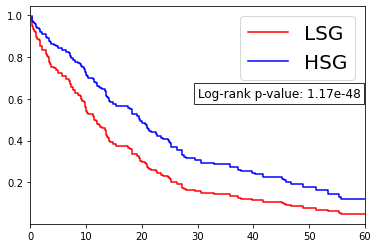

In [26]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
results = logrank_test(df1['SurvivalTime'], df2['SurvivalTime'], event_observed_A=df1['event'], event_observed_B=df2['event'])
p_value = results.p_value
predicted_survival_1 = cph.predict_survival_function(df1[ ['ARF5','MRPS35','CPB2','C6','RHOA','CSDE1','PON1','GDI2','SPP2','STRAP','ITIH1','SEC61A1','C8B','PABPC1','YBX1','SCARB1','NDUFB4','CTNNA1','LASP1']])
predicted_survival_2 = cph.predict_survival_function(df2[ ['ARF5','MRPS35','CPB2','C6','RHOA','CSDE1','PON1','GDI2','SPP2','STRAP','ITIH1','SEC61A1','C8B','PABPC1','YBX1','SCARB1','NDUFB4','CTNNA1','LASP1']])
mean_survival_1 = predicted_survival_1.mean(axis=1)
mean_survival_2 = predicted_survival_2.mean(axis=1)
min_time = min(mean_survival_1.index.min(), mean_survival_2.index.min())
max_time = max(mean_survival_1.index.max(), mean_survival_2.index.max())
plt.xlim(0, 60)
plt.step(mean_survival_1.index, mean_survival_1.values, label='LSG', color='red')
plt.step(mean_survival_2.index, mean_survival_2.values, label='HSG', color='blue')
#plt.xlabel('months')
#plt.ylabel('Survival Probability')
#plt.title('LIHC')
plt.text(30, 0.61, f'Log-rank p-value: {p_value:.2e}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.8))
plt.legend(fontsize=20) 
plt.show()


In [27]:
import pandas as pd
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
df1 = pd.read_csv('g:\\LUAD1.csv')
df2 = pd.read_csv('g:\\LUAD2.csv')
df1['SurvivalTime'] = df1['days_to_death'] / 30.44
df2['SurvivalTime'] = df2['days_to_death'] / 30.44
selected_genes = ['PFKP','TYROBP','GDE1','CDC42','RAB20','TFPI']
gene_columns = ['event', 'SurvivalTime'] + selected_genes
df1 = df1[gene_columns]
df2 = df2[gene_columns]
matched_pairs = []
for i, row1 in df1.iterrows():
    for j, row2 in df2.iterrows():
        if row1['event'] == 1 and row2['event'] == 1 and row1['SurvivalTime'] < row2['SurvivalTime']:
            matched_pairs.append((i, j))
cph = CoxPHFitter()
cph.fit(df1, duration_col='SurvivalTime', event_col='event')
cph = CoxPHFitter(penalizer=0.01)
cph.fit(df2, duration_col='SurvivalTime', event_col='event')
predicted_survival_1 = cph.predict_survival_function(df1)
predicted_hazard_1 = -cph.predict_partial_hazard(df1)
predicted_survival_1_values = predicted_survival_1.values
predicted_survival_2 = cph.predict_survival_function(df2)
predicted_hazard_2 = -cph.predict_partial_hazard(df2)
predicted_survival_2_values = predicted_survival_2.values
df = pd.concat([df1, df2], ignore_index=True)
cph = CoxPHFitter()
cph.fit(df, duration_col='SurvivalTime', event_col='event')
predicted_hazard = -cph.predict_partial_hazard(df)
c_index = concordance_index(event_times=df['SurvivalTime'], predicted_scores=predicted_hazard, event_observed=df['event'])

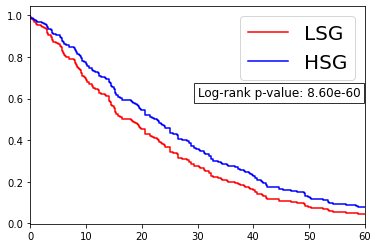

In [28]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
results = logrank_test(df1['SurvivalTime'], df2['SurvivalTime'], event_observed_A=df1['event'], event_observed_B=df2['event'])
p_value = results.p_value
predicted_survival_1 = cph.predict_survival_function(df1[ ['PFKP','TYROBP','GDE1','CDC42','RAB20','TFPI']])
predicted_survival_2 = cph.predict_survival_function(df2[ ['PFKP','TYROBP','GDE1','CDC42','RAB20','TFPI']])
mean_survival_1 = predicted_survival_1.mean(axis=1)
mean_survival_2 = predicted_survival_2.mean(axis=1)
min_time = min(mean_survival_1.index.min(), mean_survival_2.index.min())
max_time = max(mean_survival_1.index.max(), mean_survival_2.index.max())
plt.xlim(0, 60)
plt.step(mean_survival_1.index, mean_survival_1.values, label='LSG', color='red')
plt.step(mean_survival_2.index, mean_survival_2.values, label='HSG', color='blue')
#plt.xlabel('months')
#plt.ylabel('Survival Probability')
#plt.title('LUAD')
plt.text(30, 0.61, f'Log-rank p-value: {p_value:.2e}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.8))
plt.legend(fontsize=20) 
plt.show()

In [29]:
import pandas as pd
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
df1 = pd.read_csv('g:\\LUSC1.csv')
df2 = pd.read_csv('g:\\LUSC2.csv')
df1['SurvivalTime'] = df1['days_to_death'] / 30.44
df2['SurvivalTime'] = df2['days_to_death'] / 30.44
selected_genes = ['PLAU','SERPINB1','SLC39A9']
gene_columns = ['event', 'SurvivalTime'] + selected_genes
df1 = df1[gene_columns]
df2 = df2[gene_columns]
matched_pairs = []
for i, row1 in df1.iterrows():
    for j, row2 in df2.iterrows():
        if row1['event'] == 1 and row2['event'] == 1 and row1['SurvivalTime'] < row2['SurvivalTime']:
            matched_pairs.append((i, j))
cph = CoxPHFitter()
cph.fit(df1, duration_col='SurvivalTime', event_col='event')
cph = CoxPHFitter(penalizer=0.01)
cph.fit(df2, duration_col='SurvivalTime', event_col='event')
predicted_survival_1 = cph.predict_survival_function(df1)
predicted_hazard_1 = -cph.predict_partial_hazard(df1)
predicted_survival_1_values = predicted_survival_1.values
predicted_survival_2 = cph.predict_survival_function(df2)
predicted_hazard_2 = -cph.predict_partial_hazard(df2)
predicted_survival_2_values = predicted_survival_2.values
df = pd.concat([df1, df2], ignore_index=True)
cph = CoxPHFitter()
cph.fit(df, duration_col='SurvivalTime', event_col='event')
predicted_hazard = -cph.predict_partial_hazard(df)
c_index = concordance_index(event_times=df['SurvivalTime'], predicted_scores=predicted_hazard, event_observed=df['event'])

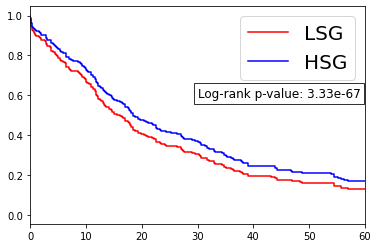

In [30]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
results = logrank_test(df1['SurvivalTime'], df2['SurvivalTime'], event_observed_A=df1['event'], event_observed_B=df2['event'])
p_value = results.p_value
predicted_survival_1 = cph.predict_survival_function(df1[ ['PLAU','SERPINB1','SLC39A9']])
predicted_survival_2 = cph.predict_survival_function(df2[['PLAU','SERPINB1','SLC39A9']])
mean_survival_1 = predicted_survival_1.mean(axis=1)
mean_survival_2 = predicted_survival_2.mean(axis=1)
min_time = min(mean_survival_1.index.min(), mean_survival_2.index.min())
max_time = max(mean_survival_1.index.max(), mean_survival_2.index.max())
plt.xlim(0, 60)
plt.step(mean_survival_1.index, mean_survival_1.values, label='LSG', color='red')
plt.step(mean_survival_2.index, mean_survival_2.values, label='HSG', color='blue')
#plt.xlabel('months')
#plt.ylabel('Survival Probability')
#plt.title('LUSC')
plt.text(30, 0.59, f'Log-rank p-value: {p_value:.2e}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.8))
plt.legend(fontsize=20) 
plt.show()


In [31]:
import pandas as pd
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
df1 = pd.read_csv('g:\\OV1.csv')
df2 = pd.read_csv('g:\\OV2.csv')
df1['SurvivalTime'] = df1['days_to_death'] / 30.44
df2['SurvivalTime'] = df2['days_to_death'] / 30.44
selected_genes = ['ISOC1','CCNI','RTF2','PSMC4','CCNG1','MPZL2','PCMT1','PPP2CB','NOP58','TUSC3']
gene_columns = ['event', 'SurvivalTime'] + selected_genes
df1 = df1[gene_columns]
df2 = df2[gene_columns]
matched_pairs = []
for i, row1 in df1.iterrows():
    for j, row2 in df2.iterrows():
        if row1['event'] == 1 and row2['event'] == 1 and row1['SurvivalTime'] < row2['SurvivalTime']:
            matched_pairs.append((i, j))
cph = CoxPHFitter()
cph.fit(df1, duration_col='SurvivalTime', event_col='event')
cph = CoxPHFitter(penalizer=0.01)
cph.fit(df2, duration_col='SurvivalTime', event_col='event')
predicted_survival_1 = cph.predict_survival_function(df1)
predicted_hazard_1 = -cph.predict_partial_hazard(df1)
predicted_survival_1_values = predicted_survival_1.values
predicted_survival_2 = cph.predict_survival_function(df2)
predicted_hazard_2 = -cph.predict_partial_hazard(df2)
predicted_survival_2_values = predicted_survival_2.values
df = pd.concat([df1, df2], ignore_index=True)
cph = CoxPHFitter()
cph.fit(df, duration_col='SurvivalTime', event_col='event')
predicted_hazard = -cph.predict_partial_hazard(df)
c_index = concordance_index(event_times=df['SurvivalTime'], predicted_scores=predicted_hazard, event_observed=df['event'])

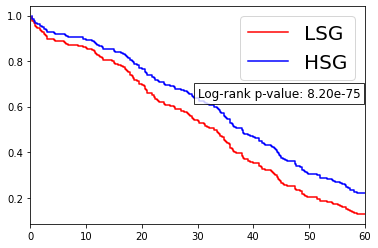

In [32]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
results = logrank_test(df1['SurvivalTime'], df2['SurvivalTime'], event_observed_A=df1['event'], event_observed_B=df2['event'])
p_value = results.p_value
predicted_survival_1 = cph.predict_survival_function(df1[ ['ISOC1','CCNI','RTF2','PSMC4','CCNG1','MPZL2','PCMT1','PPP2CB','NOP58','TUSC3']])
predicted_survival_2 = cph.predict_survival_function(df2[ ['ISOC1','CCNI','RTF2','PSMC4','CCNG1','MPZL2','PCMT1','PPP2CB','NOP58','TUSC3']])
mean_survival_1 = predicted_survival_1.mean(axis=1)
mean_survival_2 = predicted_survival_2.mean(axis=1)
min_time = min(mean_survival_1.index.min(), mean_survival_2.index.min())
max_time = max(mean_survival_1.index.max(), mean_survival_2.index.max())
plt.xlim(0, 60)
plt.step(mean_survival_1.index, mean_survival_1.values, label='LSG', color='red')
plt.step(mean_survival_2.index, mean_survival_2.values, label='HSG', color='blue')
#plt.xlabel('months')
#plt.ylabel('Survival Probability')
#plt.title('OV')
plt.text(30, 0.641, f'Log-rank p-value: {p_value:.2e}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.8))
plt.legend(fontsize=20) 
plt.show()


In [33]:
import pandas as pd
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
df1 = pd.read_csv('g:\\SKCM1.csv')
df2 = pd.read_csv('g:\\SKCM2.csv')
df1['SurvivalTime'] = df1['days_to_death'] / 30.44
df2['SurvivalTime'] = df2['days_to_death'] / 30.44
selected_genes = ['MPV17','PHF23','AP001324.1','POLDIP2','LYPLA2','CDK5','GPKOW','TXNDC11']
gene_columns = ['event', 'SurvivalTime'] + selected_genes
df1 = df1[gene_columns]
df2 = df2[gene_columns]
matched_pairs = []
for i, row1 in df1.iterrows():
    for j, row2 in df2.iterrows():
        if row1['event'] == 1 and row2['event'] == 1 and row1['SurvivalTime'] < row2['SurvivalTime']:
            matched_pairs.append((i, j))
cph = CoxPHFitter()
cph.fit(df1, duration_col='SurvivalTime', event_col='event')
cph = CoxPHFitter(penalizer=0.01)
cph.fit(df2, duration_col='SurvivalTime', event_col='event')
predicted_survival_1 = cph.predict_survival_function(df1)
predicted_hazard_1 = -cph.predict_partial_hazard(df1)
predicted_survival_1_values = predicted_survival_1.values
predicted_survival_2 = cph.predict_survival_function(df2)
predicted_hazard_2 = -cph.predict_partial_hazard(df2)
predicted_survival_2_values = predicted_survival_2.values
df = pd.concat([df1, df2], ignore_index=True)
cph = CoxPHFitter()
cph.fit(df, duration_col='SurvivalTime', event_col='event')
predicted_hazard = -cph.predict_partial_hazard(df)
c_index = concordance_index(event_times=df['SurvivalTime'], predicted_scores=predicted_hazard, event_observed=df['event'])

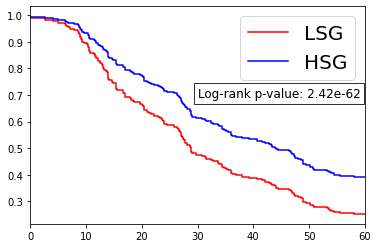

In [34]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
results = logrank_test(df1['SurvivalTime'], df2['SurvivalTime'], event_observed_A=df1['event'], event_observed_B=df2['event'])
p_value = results.p_value
predicted_survival_1 = cph.predict_survival_function(df1[ ['MPV17','PHF23','AP001324.1','POLDIP2','LYPLA2','CDK5','GPKOW','TXNDC11']])
predicted_survival_2 = cph.predict_survival_function(df2[ ['MPV17','PHF23','AP001324.1','POLDIP2','LYPLA2','CDK5','GPKOW','TXNDC11']])
mean_survival_1 = predicted_survival_1.mean(axis=1)
mean_survival_2 = predicted_survival_2.mean(axis=1)
min_time = min(mean_survival_1.index.min(), mean_survival_2.index.min())
max_time = max(mean_survival_1.index.max(), mean_survival_2.index.max())
plt.xlim(0, 60)
plt.step(mean_survival_1.index, mean_survival_1.values, label='LSG', color='red')
plt.step(mean_survival_2.index, mean_survival_2.values, label='HSG', color='blue')
#plt.xlabel('months')
#plt.ylabel('Survival Probability')
#plt.title('SKCM')
plt.text(30, 0.691, f'Log-rank p-value: {p_value:.2e}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.8))
plt.legend(fontsize=20) 
plt.show()

In [35]:
import pandas as pd
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
df1 = pd.read_csv('g:\\STAD1.csv')
df2 = pd.read_csv('g:\\STAD2.csv')
df1['SurvivalTime'] = df1['days_to_death'] / 30.44
df2['SurvivalTime'] = df2['days_to_death'] / 30.44
selected_genes = ['NFIX','TTYH3','RAB11B','TCF3','CHPF','AL928646.1','ZBTB7A','TLE5','TSPAN15','CYB561','UPF1','SCAMP4']
gene_columns = ['event', 'SurvivalTime'] + selected_genes
df1 = df1[gene_columns]
df2 = df2[gene_columns]
matched_pairs = []
for i, row1 in df1.iterrows():
    for j, row2 in df2.iterrows():
        if row1['event'] == 1 and row2['event'] == 1 and row1['SurvivalTime'] < row2['SurvivalTime']:
            matched_pairs.append((i, j))
cph = CoxPHFitter()
cph.fit(df1, duration_col='SurvivalTime', event_col='event')
cph = CoxPHFitter(penalizer=0.01)
cph.fit(df2, duration_col='SurvivalTime', event_col='event')
predicted_survival_1 = cph.predict_survival_function(df1)
predicted_hazard_1 = -cph.predict_partial_hazard(df1)
predicted_survival_1_values = predicted_survival_1.values
predicted_survival_2 = cph.predict_survival_function(df2)
predicted_hazard_2 = -cph.predict_partial_hazard(df2)
predicted_survival_2_values = predicted_survival_2.values
df = pd.concat([df1, df2], ignore_index=True)
cph = CoxPHFitter()
cph.fit(df, duration_col='SurvivalTime', event_col='event')
predicted_hazard = -cph.predict_partial_hazard(df)
c_index = concordance_index(event_times=df['SurvivalTime'], predicted_scores=predicted_hazard, event_observed=df['event'])

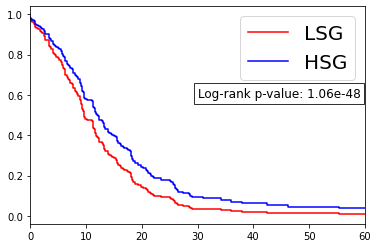

In [36]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
results = logrank_test(df1['SurvivalTime'], df2['SurvivalTime'], event_observed_A=df1['event'], event_observed_B=df2['event'])
p_value = results.p_value
predicted_survival_1 = cph.predict_survival_function(df1[  ['NFIX','TTYH3','RAB11B','TCF3','CHPF','AL928646.1','ZBTB7A','TLE5','TSPAN15','CYB561','UPF1','SCAMP4']])
predicted_survival_2 = cph.predict_survival_function(df2[  ['NFIX','TTYH3','RAB11B','TCF3','CHPF','AL928646.1','ZBTB7A','TLE5','TSPAN15','CYB561','UPF1','SCAMP4']])
mean_survival_1 = predicted_survival_1.mean(axis=1)
mean_survival_2 = predicted_survival_2.mean(axis=1)
min_time = min(mean_survival_1.index.min(), mean_survival_2.index.min())
max_time = max(mean_survival_1.index.max(), mean_survival_2.index.max())
plt.xlim(0, 60)
plt.step(mean_survival_1.index, mean_survival_1.values, label='LSG', color='red')
plt.step(mean_survival_2.index, mean_survival_2.values, label='HSG', color='blue')
#plt.xlabel('months')
#plt.ylabel('Survival Probability')
#plt.title('STAD')
plt.text(30, 0.59, f'Log-rank p-value: {p_value:.2e}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.8))
plt.legend(fontsize=20) 
plt.show()